In [8]:
using Gadfly

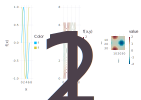

In [4]:
p1 = plot([sin,cos], 0, 2pi)
p2 = plot((x,y)->sin(x)+cos(y), 0, 2pi, 0, 2pi)
p3 = spy(ones(33)*sin.(0:(pi/16):2pi)' + cos.(0:(pi/16):2pi)*ones(33)')
hstack(p1,p2,p3)

In [9]:
function linFbas(x,xl,xm,xr)
    if(x<xl)
        return 0.0
    elseif(x<=xm)
        return (x-xl)/(xm-xl)
    elseif(x>xr)
        return 0.0
    elseif(x>xm)
        return (xr-x)/(xr-xm)
    end
end

linFbas (generic function with 1 method)

In [11]:
xvals = collect(1:20.0)/5.0
yvals = map((x)->linFbas(x,1.0,2.0,3.0),xvals);


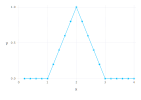

In [15]:
plot(x=xvals,y=yvals, Geom.point, Geom.line)

In [10]:
function Leg(x,n=0)
    if(n==0)
        return 1
    elseif(n==1)
        return x
    else 
        return ((2*n-1)*x*Leg(x,n-1)-(n-1)*Leg(x,n-2))/n
    end    
end

Leg (generic function with 2 methods)

In [11]:
function gQuad(func,xl,xr)
    
    x1 = ((xl+xr)-sqrt(3/5)*(xr-xl))/2
    x2 = (xl+xr)/2
    x3 = ((xl+xr)+sqrt(3/5)*(xr-xl))/2
    
    W1=5/18
    W2=4/9
    W3=5/18
    return func(x1)*W1 + func(x2)*W2 + func(x3)*W3
end

gQuad (generic function with 1 method)

In [21]:
gQuad((x)->(2*x^2+1)/(x-1/2),1,2)

5.647058823529411

In [16]:
Nbas=6

6

In [19]:
npts=Nbas+2
nintervals=Nbas-1
intsize=1/nintervals
function genfunc(i)
    newfunction = function (x) linFbas(x,(i-2)*intsize,(i-1)*intsize,(i)*intsize) end
    return newfunction
end
funcs = map(genfunc,1:Nbas)


6-element Array{##15#16{Int64},1}:
 #15
 #15
 #15
 #15
 #15
 #15

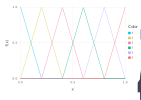

In [20]:
plot(funcs,0,1)